<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Natural Language Processing
 
_Authors: Kiefer Katovich (San Francisco), Joseph Nelson (Washington, D.C.)_
 
---


In [3]:
conda install -c conda-forge textblob

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Learning Objectives
- Discuss the major tasks involved with natural language processing.
- Discuss, on a low level, the components of natural language processing.
- Identify why natural language processing is difficult.
- Demonstrate text classification.
- Demonstrate common text preprocessing techniques.

### How Do We Use NLP in Data Science?

In data science, we are often asked to analyze unstructured text or make a predictive model using it. Unfortunately, most data science techniques require numeric data. NLP libraries provide a tool set of methods to convert unstructured text into meaningful numeric data.

- **Analysis:** NLP techniques provide tools to allow us to understand and analyze large amounts of text. For example:

    - Analyze the positivity/negativity of comments on different websites. 
    - Extract key words from meeting notes and visualize how meeting topics change over time.

- **Vectorizing for machine learning:** When building a machine learning model, we typically must transform our data into numeric features. This process of transforming non-numeric data such as natural language into numeric features is called vectorization. For example:

    - Understanding related words. Using stemming, NLP lets us know that "swim", "swims", and "swimming" all refer to the same base word. This allows us to reduce the number of features used in our model.
    - Identifying important and unique words. Using TF-IDF (term frequency-inverse document frequency), we can identify which words are most likely to be meaningful in a document.

## Introduction

### What Is Natural Language Processing (NLP)?

- Using computers to process (analyze, understand, generate) natural human languages.
- Making sense of human knowledge stored as unstructured text.
- Building probabilistic models using data about a language.

### What Are Some of the Higher-Level Task Areas?

- **Objective:** Discuss the major tasks involved with natural language processing.

We often hope that computers can solve many high-level problems involving natural language. Unfortunately, due to the difficulty of understanding human language, many of these problems are still not well solved. That said, existing solutions to these problems all involve utilizing the lower-level components of NLP discussed in the next section. Some higher-level tasks include:

- **Chatbots:** Understand natural language from the user and return intelligent responses.
    - [Api.ai](https://api.ai/)
- **Information retrieval:** Find relevant results and similar results.
    - [Google](https://www.google.com/)    
- **Information extraction:** Structured information from unstructured documents.
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation:** One language to another.
    - [Google Translate](https://translate.google.com/)
- **Text simplification:** Preserve the meaning of text, but simplify the grammar and vocabulary.
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input:** Faster or easier typing.
    - [Phrase completion application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis:** Attitude of speaker.
    - [Hater News](https://medium.com/@KevinMcAlear/building-hater-news-62062c58325c)
- **Automatic summarization:** Extractive or abstractive summarization.
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural language generation:** Generate text from data.
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation:** Speech-to-text, text-to-speech.
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering:** Determine the intent of the question, match query with knowledge base, evaluate hypotheses.
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What Are Some of the Lower-Level Components?

- **Objective:** Discuss, on a low level, the components of natural language processing.

Unfortunately, the NLP programming libraries typically do not provide direct solutions for the high-level tasks above. Instead, they provide low-level building blocks that enable us to craft our own solutions. These include:

- **Tokenization:** Breaking text into tokens (words, sentences, n-grams)
- **Stop-word removal:** a/an/the
- **Stemming and lemmatization:** root word
- **TF-IDF:** word importance
- **Part-of-speech tagging:** noun/verb/adjective
- **Named entity recognition:** person/organization/location
- **Spelling correction:** "New Yrok City"
- **Word sense disambiguation:** "buy a mouse"
- **Segmentation:** "New York City subway"
- **Language detection:** "translate this page"
- **Machine learning:** specialized models that work well with text

### Why is NLP hard?

- **Objective:** Identify why natural language processing is difficult.

Natural language processing requires an understanding of the language and the world. Several limitations of NLP are:

- **Ambiguity**:
    - Hospitals Are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English:** text messages
- **Idioms:** "throw in the towel"
- **Newly coined words:** "retweet"
- **Tricky entity names:** "Where is A Bug's Life playing?"
- **World knowledge:** "Mary and Sue are sisters", "Mary and Sue are mothers"

<a id='text_class'></a>


# Section 1: Text Classification

As you proceed through this section, note that text classification is done in the same way as all other classification models. First, the text is vectorized into a set of numeric features. Then, a standard machine learning classifier is applied. NLP libraries often include vectorizers and ML models that work particularly well with text.

> We will refer to each piece of text we are trying to classify as a document.
> - For example, a document could refer to an email, book chapter, tweet, article, or text message.

**Text classification is the task of predicting which category or topic a text sample is from.**

We may want to identify:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?

**Predictions are often made by using the words as features and the label as the target output.**

Starting out, we will make each unique word (across all documents) a single feature. In any given corpora, we may have hundreds of thousands of unique words, so we may have hundreds of thousands of features!

- For a given document, the numeric value of each feature could be the number of times the word appears in the document.
    - So, most features will have a value of zero, resulting in a sparse matrix of features.

- This technique for vectorizing text is referred to as a bag-of-words model. 
    - It is called bag of words because the document's structure is lost — as if the words are all jumbled up in a bag.
    - The first step to creating a bag-of-words model is to create a vocabulary of all possible words in the corpora.

> Alternatively, we could make each column an indicator column, which is 1 if the word is present in the document (no matter how many times) and 0 if not. This vectorization could be used to reduce the importance of repeated words. For example, a website search engine would be susceptible to spammers who load websites with repeated words. So, the search engine might use indicator columns as features rather than word counts.

**We need to consider several things to decide if bag-of-words is appropriate.**

- Does order of words matter?
- Does punctuation matter?
- Does upper or lower case matter?

## Reading in the Yelp Reviews

Throughout this lesson, we will use Yelp reviews to practice and discover common low-level NLP techniques.

You should be familiar with these terms, as they are frequently used in NLP:
- **corpus**: a collection of documents (derived from the Latin word for "body")
- **corpora**: plural form of corpus

Throughout this lesson, we will use a model very popular for text classification called Naive Bayes (the "NB" in `BinonmialNB` and `MultinomialNB` below). If you are unfamiliar with it, know that it works exactly the same as all other models in scikit-learn! We will look extensively at the mechanics behind Naive Bayes later in the course. However, see the [appendix](#bayes) at the end of this notebook for a quick introduction.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

We are going to build a model that will predict whether a body of text returns 1 or 5 stars

In [2]:
# Read yelp.csv into a DataFrame.
path = r'./data/yelp.csv'
yelp = pd.read_csv(path)

# Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# Define X and y.
X = yelp_best_worst.text
y = yelp_best_worst.stars

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
# The head of the original data
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


<a id='count_vec'></a>


### Creating Features Using CountVectorizer

- **What:** Converts each document into a set of words and their counts.
- **Why:** To use a machine learning model, we must convert unstructured text into numeric features.
- **Notes:** Relatively easy with English language text, not as easy with some languages.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

For each word used in any of the reviews, a column has now been created in an array. For each review then, a row is added where the words are counted up. Most of the values will be 0 as not all the words will feature in each review. 

Note: if you want to use it as an indicator (1 if the word is present, 0 if not) then set binary=True when calling CountVectorizer

In [6]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

(3064, 16825)

In [9]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [10]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

One common method of reducing the number of features is converting all text to lowercase before generating features! Note that to a computer, `aPPle` is a different token/"word" than `apple`. So, by converting both to lowercase letters, it ensures fewer features will be generated. It might be useful not to convert them to lowercase if capitalization matters.

In [11]:
# Don't convert to lowercase.
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape
vect.get_feature_names()[-10:]

['zoning',
 'zoo',
 'zucchini',
 'zuchinni',
 'zupa',
 'zwiebel',
 'zzed',
 'École',
 'éclairs',
 'ém']

Let's build a model then. What we are going to do is rebuild our CountVectorizer and then use train_test_split to create our training and testing sets. We will then use these arrays to build a logistic regression model to predict whether a review is 1 or 5 stars. 

In other words, we are building a model which will predict a star rating based on the unique words used in the review.

In [35]:
# Use default options for CountVectorizer.
vect = CountVectorizer()

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Logistic Regression to predict the star rating.
lr = LogisticRegression()
lr.fit(X_train_dtm, y_train)
y_pred= lr.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9256360078277887


In [34]:
# Calculate null accuracy.
yelp_best_worst.stars.value_counts(normalize=True).max()

0.8166911404796867

Our model predicts 5 stars with ~92% accuracy, which is an improvement over this baseline 82% accuracy (assuming our model always predicts 5 stars).

We can also plot a confusion matrix!

In [26]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_pred, y_test),index=['Predict *', 'Predict *****'],columns=['Actual *','Actual *****'])

,Actual *,Actual *****
Predict *,140,32
Predict *****,44,806


Let's take a look next at other ways of preprocessing text!

- **Objective:** Demonstrate common text preprocessing techniques.

<a id='ngrams'></a>
# Section 2: N-Grams

N-grams are features which consist of N consecutive words. This is useful because using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`!

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [6]:
# Include 1-grams and 2-grams.
# Use default options for CountVectorizer.
vect = CountVectorizer(ngram_range=(1,2))

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Logistic Regression to predict the star rating.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_dtm, y_train)
y_pred= lr.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred)))

0.9324853228962818


In [40]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_pred, y_test),index=['Predict *', 'Predict *****'],columns=['Actual *','Actual *****'])

,Actual *,Actual *****
Predict *,137,22
Predict *****,47,816


In [39]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

['zone out', 'zone when', 'zones', 'zones dolls', 'zoning', 'zoning issues', 'zoo', 'zoo and', 'zoo is', 'zoo not', 'zoo the', 'zoo ve', 'zoyo', 'zoyo for', 'zucca', 'zucca appetizer', 'zucchini', 'zucchini and', 'zucchini bread', 'zucchini broccoli', 'zucchini carrots', 'zucchini fries', 'zucchini pieces', 'zucchini strips', 'zucchini veal', 'zucchini very', 'zucchini with', 'zuchinni', 'zuchinni again', 'zuchinni the', 'zumba', 'zumba class', 'zumba or', 'zumba yogalates', 'zupa', 'zupa flavors', 'zuzu', 'zuzu in', 'zuzu is', 'zuzu the', 'zwiebel', 'zwiebel kräuter', 'zzed', 'zzed in', 'éclairs', 'éclairs napoleons', 'école', 'école lenôtre', 'ém', 'ém all']


<a id='stopwords'></a>

# Section 3: Stop-Word Removal

- **What:** This process is used to remove common words that will likely appear in any text.
- **Why:** Because common words exist in most documents, they likely only add noise to your model and should be removed.

**What are stop words?**
Stop words are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners, e.g., "to," "the," "and." However, they are so commonly used that they are generally worthless for predicting the class of a document. Since "a" appears in spam and non-spam emails, for example, it would only contribute noise to our model.

Example: 

> 1. Original sentence: "The dog jumped over the fence"  
> 2. After stop-word removal: "dog jumped over fence"

The fact that there is a fence and a dog jumped over it can be derived with or without stop words.

In [92]:
# Show vectorizer options.
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {`english`}, list, or None (default)
- If `english`, a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. `max_df` can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms. (If `max_df` = 0.7, then if > 70% of documents contain a word it will not be included in the feature set!)

In [5]:
vect = CountVectorizer(max_df=0.7)

In [ ]:
vect = CountVectorizer(max_features=100)

In [4]:
# Remove English stop words.
vect = CountVectorizer(stop_words='english')

In [94]:
# Check the stop words
print((vect.get_stop_words()))

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'nei

In [7]:
# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Logistic Regression to predict the star rating.
lr = LogisticRegression()
lr.fit(X_train_dtm, y_train)
y_pred= lr.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred)))

0.9324853228962818


<a id='cvec_opt'></a>
### Other CountVectorizer Options

- `max_features`: int or None, default=None
- If not None, build a vocabulary that only consider the top `max_features` ordered by term frequency across the corpus. This allows us to keep more common n-grams and remove ones that may appear once. If we include words that only occur once, this can lead to said features being highly associated with a class and cause overfitting.

In [9]:
# Remove English stop words and only keep 100 features.
vect = CountVectorizer(stop_words='english', max_features=100)

In [96]:
# All 100 features
print((vect.get_feature_names()))

[u'amazing', u'area', u'atmosphere', u'awesome', u'bad', u'bar', u'best', u'better', u'big', u'came', u'cheese', u'chicken', u'clean', u'coffee', u'come', u'day', u'definitely', u'delicious', u'did', u'didn', u'dinner', u'don', u'eat', u'excellent', u'experience', u'favorite', u'feel', u'food', u'free', u'fresh', u'friendly', u'friends', u'going', u'good', u'got', u'great', u'happy', u'home', u'hot', u'hour', u'just', u'know', u'like', u'little', u'll', u'location', u'long', u'looking', u'lot', u'love', u'lunch', u'make', u'meal', u'menu', u'minutes', u'need', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'perfect', u'phoenix', u'pizza', u'place', u'pretty', u'prices', u'really', u'recommend', u'restaurant', u'right', u'said', u'salad', u'sandwich', u'sauce', u'say', u'service', u'staff', u'store', u'sure', u'table', u'thing', u'things', u'think', u'time', u'times', u'took', u'town', u'tried', u'try', u've', u'wait', u'want', u'way', u'went', u'wine', u'work', u'worth', 

Just like with all other models, more features does not mean a better model. So, we must tune our feature generator to remove features whose predictive capability is none or very low.

In this case, there is roughly a 1.6% increase in accuracy when we double the n-gram size and increase our max features by 1,000-fold. Note that if we restrict it to only unigrams, then the accuracy increases even more! So, bigrams were very likely adding more noise than signal. 

In the end, by only using 16,000 unigram features we came away with a much smaller, simpler, and easier-to-think-about model which also resulted in higher accuracy.

In [4]:
# Include 1-grams and 2-grams, and limit the number of features.

print('1-grams and 2-grams, up to 100K features:')
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)


# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Logistic Regression to predict the star rating.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_dtm, y_train)
y_pred= lr.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred)))

print()
print('1-grams only, up to 100K features:')
vect = CountVectorizer(ngram_range=(1, 1), max_features=100000)


# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Logistic Regression to predict the star rating.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_dtm, y_train)
y_pred= lr.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred)))

1-grams and 2-grams, up to 100K features:
0.9305283757338552

1-grams only, up to 100K features:
0.9256360078277887


- `min_df`: Float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [5]:
# Include 1-grams and 2-grams, and only include terms that appear at least two times.
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)


# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Logistic Regression to predict the star rating.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_dtm, y_train)
y_pred= lr.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred)))

0.9315068493150684


<a id='stem'></a>
# Section 4: Stemming and Lemmatization

Stemming is a crude process of removing common endings from sentences, such as "s", "es", "ly", "ing", and "ed".

- **What:** Reduce a word to its base/stem/root form.
- **Why:** This intelligently reduces the number of features by grouping together (hopefully) related words.
- **Notes:**
    - Stemming uses a simple and fast rule-based approach.
    - Stemmed words are usually not shown to users (used for analysis/indexing).
    - Some search engines treat words with the same stem as synonyms.

In [99]:
# Print the first review.
print((yelp_best_worst.text[0]))

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [3]:
#We will use the text blob function to help us in our analysis
from textblob import TextBlob

<a id='textblob_install'></a>

### Install TextBlob

The TextBlob Python library provides a simplified interface for exploring common NLP tasks including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

To proceed with the lesson, first install TextBlob, as explained below. We tend to prefer Anaconda-based installations, since they tend to be tested with our other Anaconda packages. If it doesn't work in the notebook, open up anaconda navigator go to environments, click the triangle next to base(root) and select Open Terminal and run the install code there.

**To install textblob run:**

> `conda install -c conda-forge textblob`

**Or:**

> `pip install textblob`

> `python -m textblob.download_corpora lite`

You will also need to run in this notebook
`import nltk`
`nltk.download('punkt')`
`nltk.download('wordnet')`

In [4]:
review = TextBlob(yelp_best_worst.text[0])

In [5]:
# List the words.
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [59]:
# Initialize stemmer.
stemmer = SnowballStemmer('english')

# Stem each word.
print([stemmer.stem(word) for word in review.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delic

Some examples you can see are "excellent" stemmed to "excel" and "amazing" stemmed to "amaz".

Lemmatization is a more refined process that uses specific language and grammar rules to derive the root of a word.  

This is useful for words that do not share an obvious root such as "better" and "best".

- **What:** Lemmatization derives the canonical form ("lemma") of a word.
- **Why:** It can be better than stemming.
- **Notes:** Uses a dictionary-based approach (slower than stemming).

In [62]:
# Assume every word is a noun.
print([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'The', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 'skill

Some examples you can see are "filled" lemmatized to "fill" and "was" lemmatized to "wa".


In [63]:
# Assume every word is a verb.
print([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'The', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'be', 'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', 'and'

Some examples you can see are "was" lemmatized to "be" and "arrived" lemmatized to "arrive".

**More Lemmatization and Stemming Examples**

|Lemmatization|Stemming|
|-------------|---------|
|shouted → shout|badly → bad|
|best → good|computing → comput|
|better → good|computed → comput|
|good → good|wipes → wip|
|wiping → wipe|wiped → wip|
|hidden → hide|wiping → wip|

### Activity: Knowledge Check
- What other words or phrases might cause problems with stemming? Why?
- What other words or phrases might cause problems with lemmatization? Why?

----



In [77]:
# Define a function that accepts text and returns a list of lemmas.
def split_into_lemmas(text):
    
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [78]:
# Use split_into_lemmas as the feature extraction function (Warning: SLOW!).
vect = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace')

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Logistic Regression to predict the star rating.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_dtm, y_train)
y_pred= lr.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred)))

0.9217221135029354


In [79]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

['yourselves', 'youth', 'youthful', 'yow', 'yr', 'yu', 'yuck', 'yucky', 'yuk', 'yukon', 'yum', 'yumm', 'yummie', 'yummier', 'yumminess', 'yummm', 'yummmm', 'yummmmmmers', 'yummmmy', 'yummy', 'yummy-we', 'yumness', 'yup', 'yuppie', 'yuuuuummmmmyyy', 'yuyuyummy', 'yuzu', 'zen', 'zen-like', 'zero', 'zero-star', 'zest', 'zhou', 'zilch', 'zinc', 'zing', 'zip', 'zipper', 'ziti', 'zone', 'zoning', 'zoo', 'zucchini', 'zuchinni', 'zupa', 'zwiebel-kräuter', 'zzed', 'École', 'éclairs', 'ém']


With all the available options for `CountVectorizer()`, you may wonder how to decide which to use! It's true that you can sometimes reason about which preprocessing techniques might work best. However, you will often not know for sure without trying out many different combinations and comparing their accuracies. 

> Keep in mind that you should constantly be thinking about the result of each preprocessing step instead of blindly trying them without thinking. Does each type of preprocessing "makes sense" with the input data you are using? Is it likely to keep intact the signal and remove noise?

<a id='tfidf'></a>
# Section 5: Term Frequency–Inverse Document Frequency (TF–IDF)

While a Count Vectorizer simply totals up the number of times a "word" appears in a document, the more complex TF-IDF Vectorizer analyzes the uniqueness of words between documents to find distinguishing characteristics. 
     
- **What:** Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.
- **Why:** It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).
- **Notes:** It's used for search-engine scoring, text summarization, and document clustering.

In [80]:
# Example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [81]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


The higher the TF–IDF value, the more "important" the word is to that specific document. Here, "cab" is the most important and unique word in document 1, while "please" is the most important and unique word in document 2. TF–IDF is often used for training as a replacement for word count.

**More details:** [TF–IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

<a id='yelp_tfidf'></a>
## Using TF–IDF to Summarize a Yelp Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF–IDF.

In [82]:
# Create a document-term matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')

# Fit transform Yelp data.
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28880)

In [85]:
# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Logistic Regression to predict the star rating.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_dtm, y_train)
y_pred= lr.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred)))

0.8855185909980431


We can see the accuracy for this model is lower than using countvectorizer(). TF-IDF does have some other interesting application too. Check out the function below to see how we can further analyse a text

In [86]:
def summarize():
    
    # Choose a random review that is at least 300 characters.
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        #review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # Create a dictionary of words and their TF–IDF scores.
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # Print words with the top five TF–IDF scores.
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # Print five random words.
    print(('\n' + 'RANDOM WORDS:'))
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # Print the review.
    print(('\n' + review_text))

In [87]:
summarize()

TOP SCORING WORDS:
scottsdale
zinc
shopping
lofts
coffers

RANDOM WORDS:
want
dining
fantastic
coffers
street

KIerland Commons is a fantastic development. Lots of great shopping, restaurants, lofts, etc.... Only problem for me is that I live in Scottsdale and frequent the Scottsdale Public Library, therefore I want my tax dollars to go into Scottsdale's coffers so I will try to do most of my shopping and dining across the street at the Scottsdale Quarter (except for Zinc Bistro - I'll keep going to Zinc regardless of what zip code it's in).


<a id='sentiment'></a>
# Section 6: Sentiment Analysis

Understanding how positive or negative a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of "positive" words and a list of "negative" words and count how many occur in a document. 
- Train a classifier given many examples of "positive" documents and "negative" documents. 
    - Note that this technique is often just an automated way to derive the first (e.g., using bag-of-words with logistic regression, a coefficient is assigned to each word!).

For the most accurate sentiment analysis, you will want to train a custom sentiment model based on documents that are particular to your application. Generic models (such as the one we are about to use!) often do not work as well as hoped.

As we will do below, always make sure you double-check that the algorithm is working by manually verifying that scores correctly correspond to positive/negative reviews! Otherwise, you may be using numbers that are not accurate.

In [88]:
print(review)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [89]:
# Polarity ranges from -1 (most negative) to 1 (most positive).
review.sentiment.polarity

0.40246913580246907

This review is more positive than it is negative

In [95]:
# Define a function that accepts text and returns the polarity.
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity
    #return TextBlob(text).sentiment.polarity

In [96]:
# Create a new DataFrame column for sentiment (Warning: SLOW!).
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

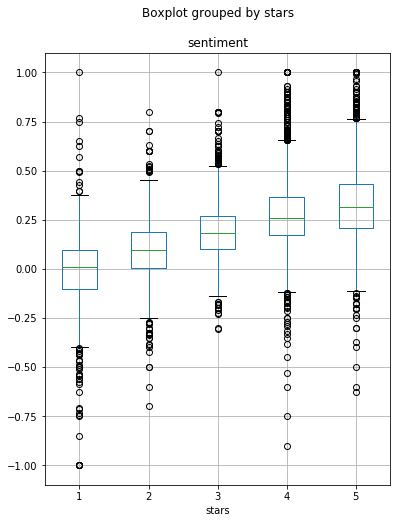

In [102]:
# Box plot of sentiment grouped by stars
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(6,8))
yelp.boxplot(column='sentiment', by='stars',ax=ax);

We can see higher reviewed ratings are more positive on average- but wait! There are 1* reviews with very positive sentiment scores...

In [103]:
# Reviews with most positive sentiment
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \r\nA-MAZ-ING!\r\n...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [104]:
# Reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [105]:
# Widen the column display.
pd.set_option('max_colwidth', 500)

In [106]:
# Negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,-0.302083


In [128]:
# Positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667


What has gone wrong with these examples?


In [129]:
# Reset the column display width.
pd.reset_option('max_colwidth')

<a id='more_textblob'></a>
## Bonus: Fun TextBlob Features

In [138]:
# Spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [139]:
# Spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), (u'parrot', 0.007052186177715092)]

In [140]:
# Definitions
Word('bank').define('v')

[u'tip laterally',
 u'enclose with a bank',
 u'do business with a bank or keep an account at a bank',
 u'act as the banker in a game or in gambling',
 u'be in the banking business',
 u'put into a bank account',
 u'cover with ashes so to control the rate of burning',
 u'have confidence or faith in']

In [141]:
# Language identification
TextBlob('Hola amigos').detect_language()

u'es'

<a id='conclusion'></a>
## Conclusion

- NLP is a gigantic field.
- Understanding the basics broadens the types of data you can work with.
- Simple techniques go a long way.
- Use scikit-learn for NLP whenever possible.

While we used SKLearn and TextBlob today, another popular python NLP library is [Spacy](https://spacy.io).